
iter=0, theta_0=0.5608667979440775, theta_1=0.9792005727918904, theta_2=0.34219229740868806, theta_3=1.005391368643359, cost= 251.6105400926036

iter=1, theta_0=0.5832993876337501, theta_1=1.0341620369048348, theta_2=0.42742996633817765, theta_3=1.107061639553289, cost= 234.0980616925815

iter=2, theta_0=0.604937227715079, theta_1=1.088858789981948, theta_2=0.5118331984782328, theta_3=1.2070154557699015, cost= 217.44014884234218

iter=3, theta_0=0.6257910114888857, theta_1=1.14329348036659, theta_2=0.5954118880087835, theta_3=1.3052834595667229, cost= 201.60827074361717

iter=4, theta_0=0.6458712640143704, theta_1=1.1974687244221458, theta_2=0.6781758079822379, theta_3=1.4018957601676998, cost= 186.57480575195885

iter=5, theta_0=0.6651883448368943, theta_1=1.2513871069964284, theta_2=0.7601346119183546, theta_3=1.496881942948959, cost= 172.31301270091

iter=6, theta_0=0.6837524506705136, theta_1=1.305051181878769, theta_2=0.8412978353765788, theta_3=1.590271078482428, cost= 158.79700

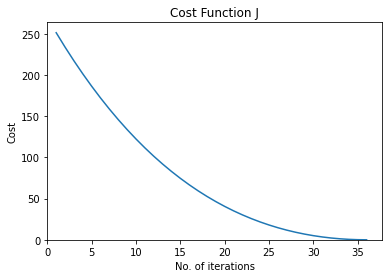

In [1]:
import numpy as np 
import time
import matplotlib.pyplot as plt
%matplotlib inline

"""
The y = target is to optimize this equation:
    y = theta0x0 + theta1x1 + theta2x2 + theta3x3
    where (x0,x1,x2,x3) = (1, 2, 3, 4)
    What are the best values for the 4 weights theta_0 to theta_3?
    We are going to use the Gradient Descent algorithm for the best possible values after a number of generations.
    OR,
    a + 2b + 3c + 4d = 30
    y = a + 2b + 3c + 4d - 30
    a = ? b = ? c = ? d = ?
"""

X = np.transpose(np.array([2,3,4]))
y = 30

#pick some random value to start with
theta_0 = np.random.random()
theta_1 = np.random.random()
theta_2 = np.random.random()
theta_3 = np.random.random()

def hypothesis (theta_0,theta_1,theta_2,theta_3,X):
    return theta_1*X[0] + theta_2*X[1] + theta_3*X[2] + theta_0

def cost_function (X,y,theta_0,theta_1, theta_2, theta_3):
    m = len(X)
    summation = 0.0
    for i in range (m):
        summation += ((theta_1*X[0] + theta_2*X[1] + theta_3*X[2] + theta_0) - y)**2
    return summation /(2*m)

def gradient_descent(X, y, theta_0, theta_1, theta_2, theta_3, learning_rate):
    t0_deriv = 0
    t1_deriv = 0
    t2_deriv = 0
    t3_deriv = 0
    m = len(X)
    
    for i in range (m):
        t0_deriv += (theta_1*X[0] + theta_2*X[1] + theta_3*X[2] + theta_0) - y
        t1_deriv += ((theta_1*X[0] + theta_0) - y)* X[0]
        t2_deriv += ((theta_2*X[1] + theta_0) - y)* X[1]
        t3_deriv += ((theta_3*X[2] + theta_0) - y)* X[2]
    
    theta_0 -= (1/m) * learning_rate * t0_deriv
    theta_1 -= (1/m) * learning_rate * t1_deriv
    theta_2 -= (1/m) * learning_rate * t2_deriv
    theta_3 -= (1/m) * learning_rate * t3_deriv
    
    return theta_0,theta_1, theta_2, theta_3

def training (X, y, theta_0, theta_1, theta_2, theta_3, learning_rate, iters):
    cost_history = [np.Inf]
    best_cost = np.Inf
    t0_history = [0]
    t1_history = [0]
    t2_history = [0]
    t3_history = [0]
    
    for i in range(iters):
        theta_0,theta_1,theta_2,theta_3 = gradient_descent(X, y, theta_0, theta_1, theta_2, theta_3, learning_rate)
        t0_history.append(theta_0)
        t1_history.append(theta_1)
        t2_history.append(theta_2)
        t3_history.append(theta_3)
        cost = cost_function(X, y, theta_0, theta_1, theta_2, theta_3)
        cost_history.append(cost)
        
        if cost < best_cost:
            best_cost = cost
            Thetas = [theta_0,theta_1, theta_2, theta_3]
        
        if np.mean(cost_history[-3:])<=0.5:
            break
            
        print ("\niter={}, theta_0={}, theta_1={}, theta_2={}, theta_3={}, cost= {}".format(i, theta_0, theta_1, theta_2, theta_3, cost))
            
    return Thetas, cost_history

st = time.time()
best_thetas, cost_history = training (X, y, theta_0, theta_1, theta_2, theta_3, 0.001, 50)
tt = time.time() - st
print("\nTotal time taken to execute: ", tt)
print("\nBest coefficient values: ", best_thetas)
theta_0, theta_1, theta_2, theta_3 = best_thetas[0], best_thetas[1], best_thetas[2], best_thetas[3]
print("\nExpecte: 30, Estimated: ", theta_0 + 2*theta_1 + 3*theta_2 + 4*theta_3)

#Plot the cost function
plt.title('Cost Function J')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(cost_history)
plt.ylim(ymin=0)
plt.xlim(xmin=0)
plt.show()